In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline


###    Import the data from "fcc-forum-pageviews.csv":

In [114]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col = 'date',header=0, names= ["date","value"])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Set the index to the "date" column:

In [115]:
#df=df.set_index("date")
#df.index = pd.DatetimeIndex(df.index)
df.index

DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)

In [116]:
df.quantile(0.975)
df.quantile(0.025)
df_clean = df.loc[(df["value"]>=df["value"].quantile(0.025)) & (df["value"]<= df["value"].quantile(0.975))]
df = df.loc[(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))].copy()

In [117]:
df_clean.value
df.value.loc[lambda s: s>10000]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


   ### Create a draw_line_plot function that uses matplotlib to draw a line chart. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Figure(1008x432)


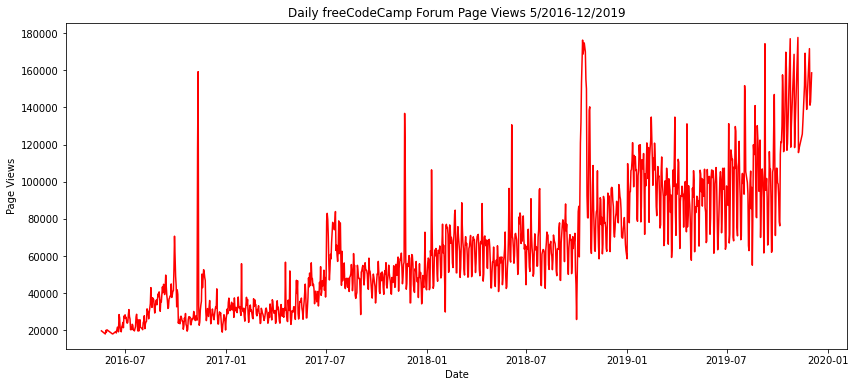

In [118]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(df_clean, color="r")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    fig.savefig("line_plot.png")
    return fig

print(draw_line_plot())

### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

Figure(1008x432)


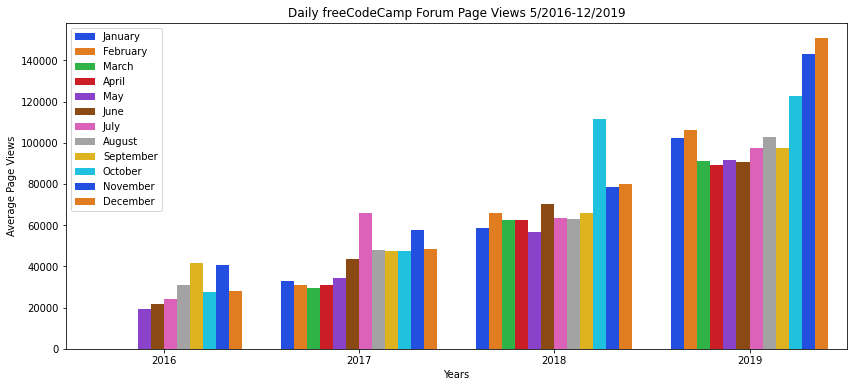

In [119]:
def draw_bar_plot():
    df_bar = df_clean.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()
    data_group = df_bar.groupby(["year", "month"], sort=False).mean()
    data_bar = data_group.copy()
    data_bar["Years"] = data_group.index.get_level_values("year")
    data_bar["Months"] = data_group.index.get_level_values("month")
    #data_bar
    fig1, ax1 = plt.subplots(figsize=(14,6))
    sns.barplot(data= data_bar, ax=ax1, x="Years", hue="Months", y= "value", hue_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], palette="bright")
    ax1.set_ylabel("Average Page Views")
    ax1.set_xlabel("Years")
    ax1.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax1.legend(loc="upper left")
    fig1.savefig("bar_plot.png")
    return fig1

print(draw_bar_plot())

### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

Figure(1152x432)


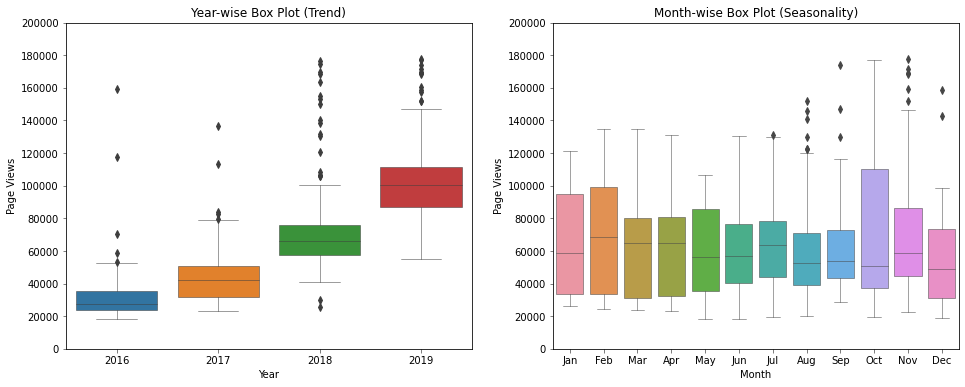

In [124]:
def draw_box_plot():
    df_box = df_clean.copy()
    df_box["year"] = df_box.index.year
    df_box["month"] = df_box.index.month_name()
    #Realizar figura
    fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
    sns.boxplot(data= df_box, ax=ax1, x="year", y="value", linewidth=0.5)
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
    ax1.tick_params(width=0.5)
    #ax1.set_ylim(top=200000)
    ax1.set_yticks(list(range(0,220000,20000)))
    sns.boxplot(data=df_box, ax=ax2, x="month", y= "value", order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],linewidth=0.5)
    ax2.set_xticklabels(["Jan","Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    #ax2.set_ylim(bottom=0,top=200000)
    ax2.set_yticks(list(range(0,220000,20000)))
    ax2.tick_params(width=0.5)
    #ax2.autoscale()
    fig2.savefig("box_plot.png")
    return fig2
print(draw_box_plot())